<a href="https://colab.research.google.com/github/MasatakaIwata/Car_price_prediction_used_cars/blob/master/Car_price_prediction(used_cars).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 패키지 설치
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [4]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars
train_df = pd.read_csv("/content/drive/MyDrive/car data.csv")

# 데이터 샘플 확인
train_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 1. 비즈니스 문제 정의와 분석 목적 도출 과정
 - 비즈니스 문제 정의: 중고차 수요 예측
 - 분석 목적 도출: 과거 데이터를 사용해 미래 중고차 수요를 예측하고 재고 관리 및 마케팅 전략을 최적화한다.

# 2. 해당 데이터에 대한 도메인 지식 설명
 - Car_Name: 차의 이름
 - Year: 제조년
 - Selling_Price: 판매 가격
 - Present_Price: 현재 가격
 - Driven_kms: 주행 거리
 - Fuel_Type: 연료의 종류
 - Selling_type: 판매 유형
 - Transmission: 변속기 종류
 - Owner: 소유자의 수

# 3. 데이터의 통계적 측정과 분석

In [5]:
# 데이터의 통계적 측정
summary_stats = train_df.describe()
print(summary_stats)
print('---------------------------------------')

# 범주형 데이터의 분포 확인
categorical_cols = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
for col in categorical_cols:
    print(train_df[col].value_counts())
print('---------------------------------------')

# 수치 데이터에 대한 상관 계수 계산
numeric_cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
correlation_matrix = train_df[numeric_cols].corr()
print(correlation_matrix)
print('---------------------------------------')

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
---------------------------------------
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS         

# 4. 데이터 시각화

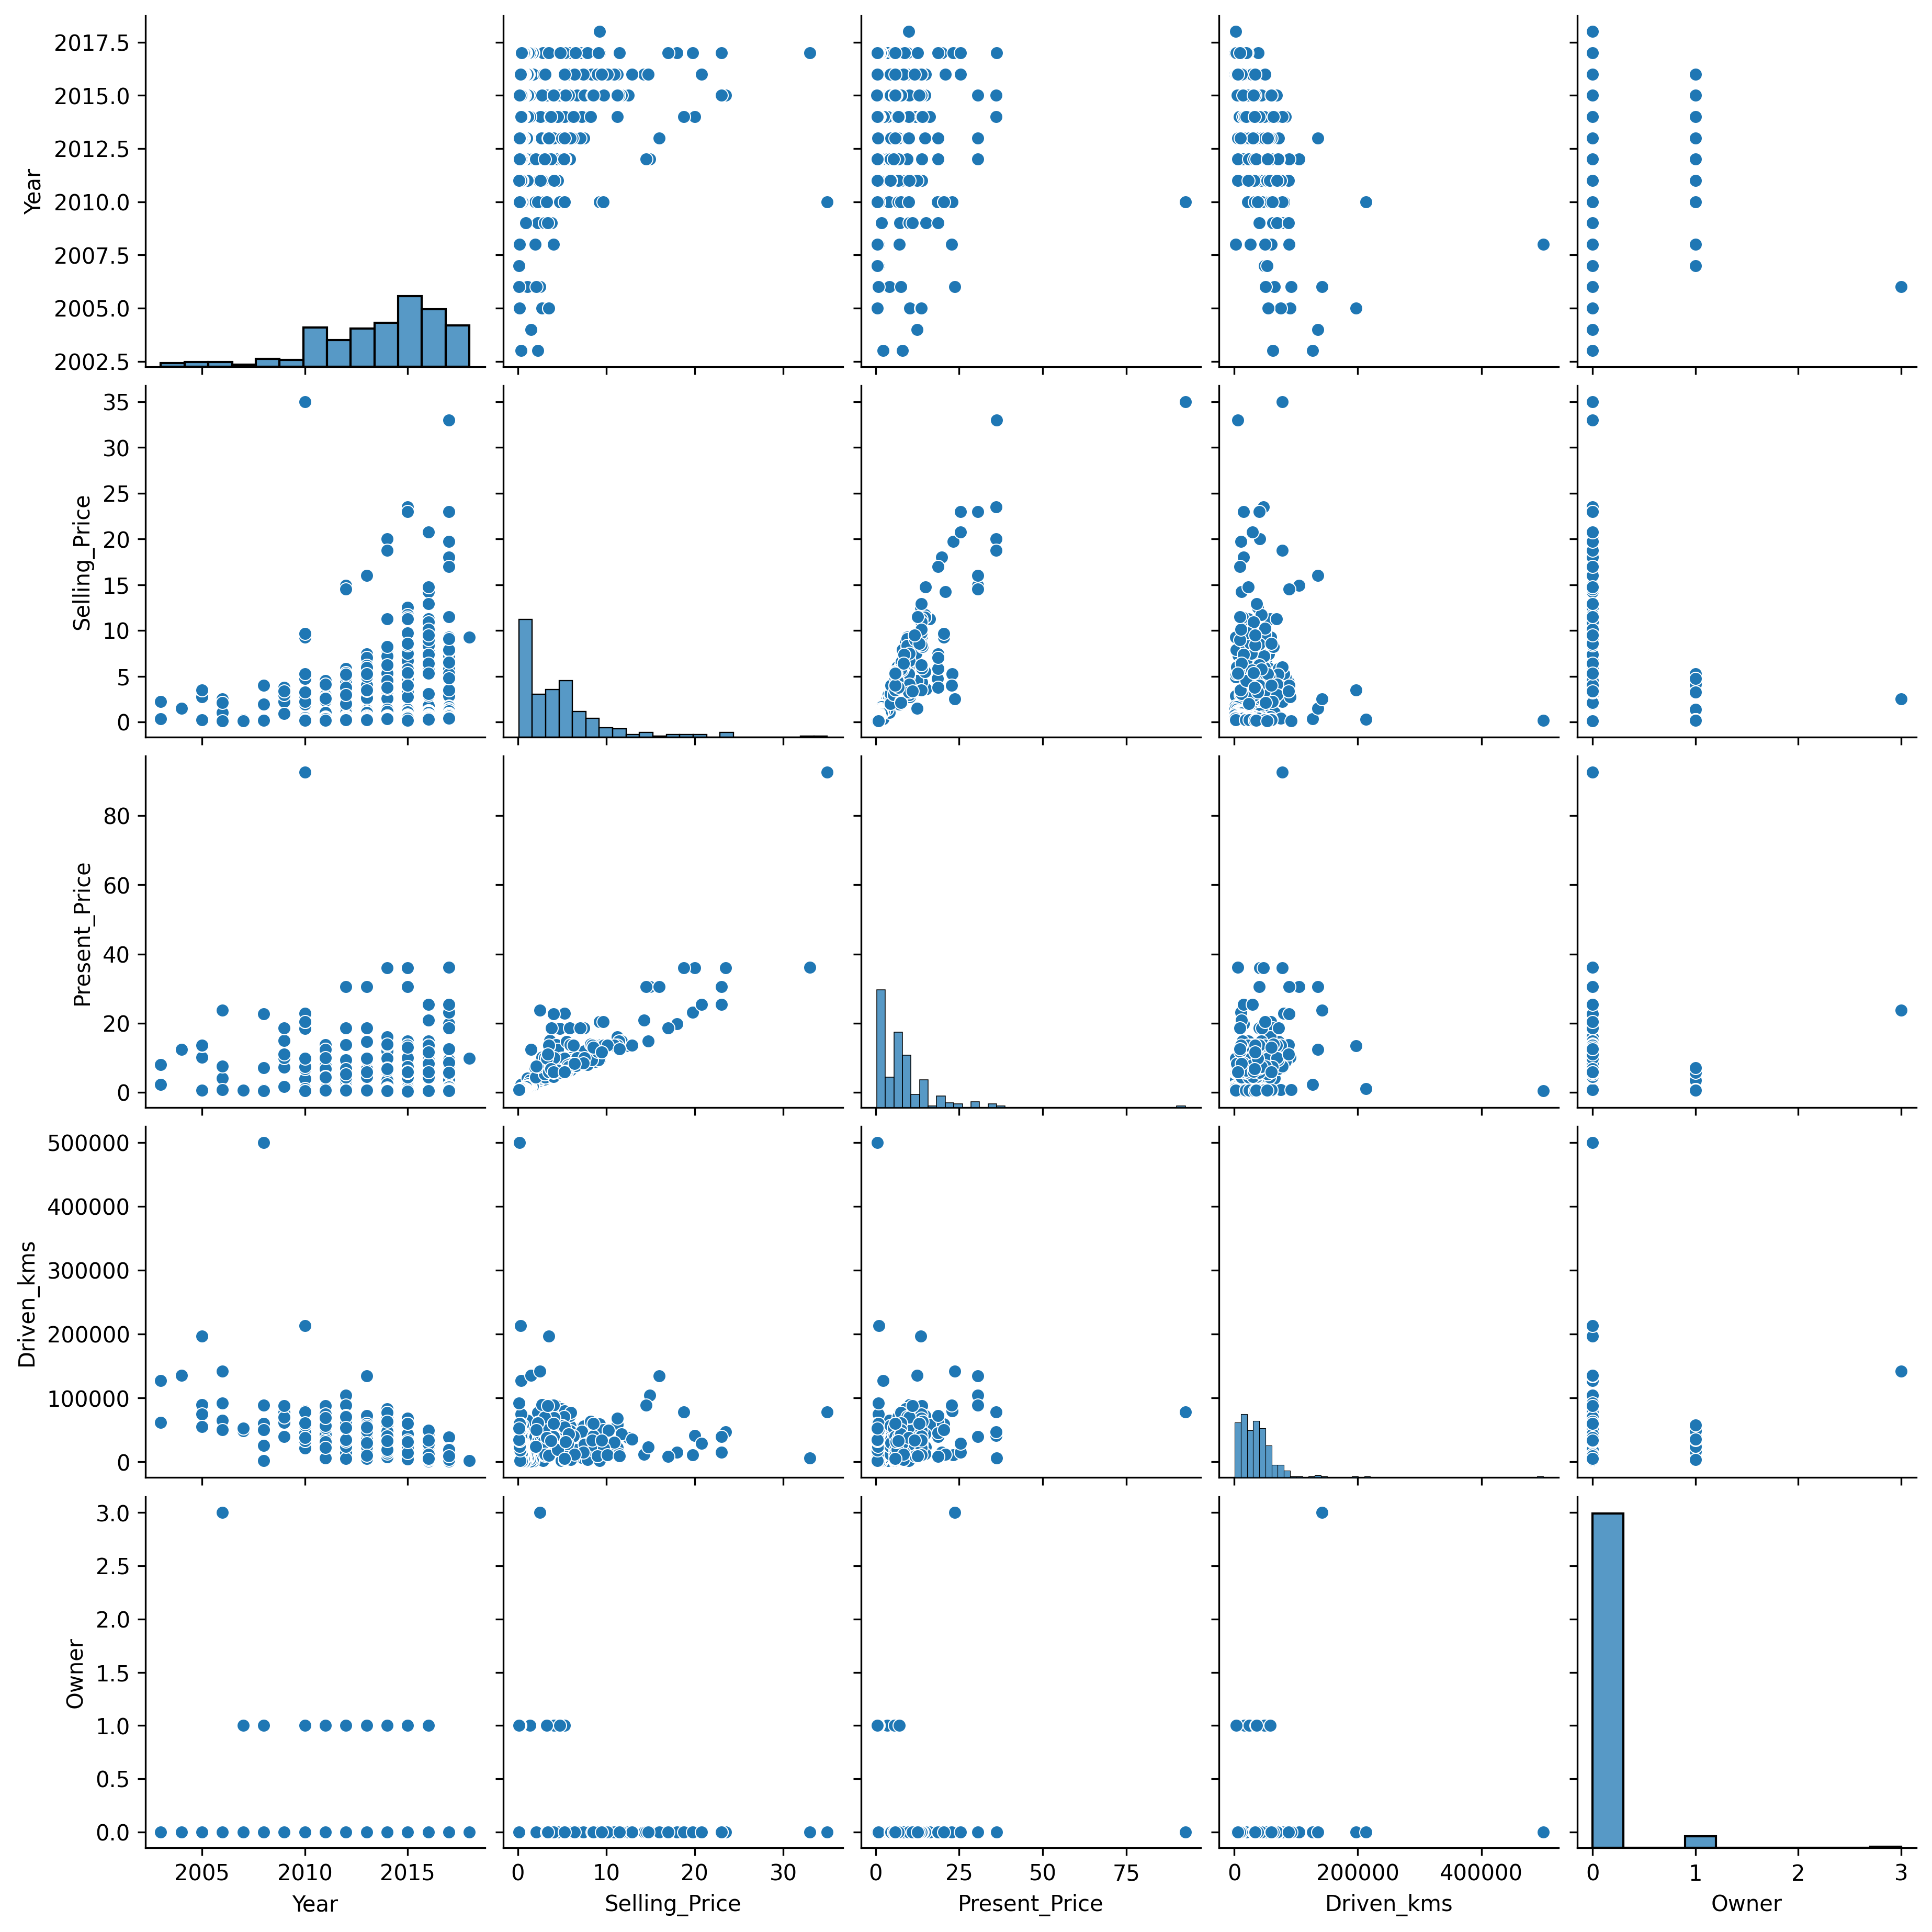

In [6]:
sns.pairplot(train_df)

# 5. 예측 모델 구축

In [7]:
# 특징 및 목표 변수 선택
X = train_df[['Year', 'Present_Price', 'Driven_kms']]
y = train_df['Selling_Price']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구축 및 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평균 제곱 오차 평가
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 평균 절대 오차 계산
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

Mean Squared Error: 1.151444157704919
Mean Absolute Error: 0.6964000000000005
R^2 Score: 0.9500145456829757


# 6. 모델 해석 및 결론

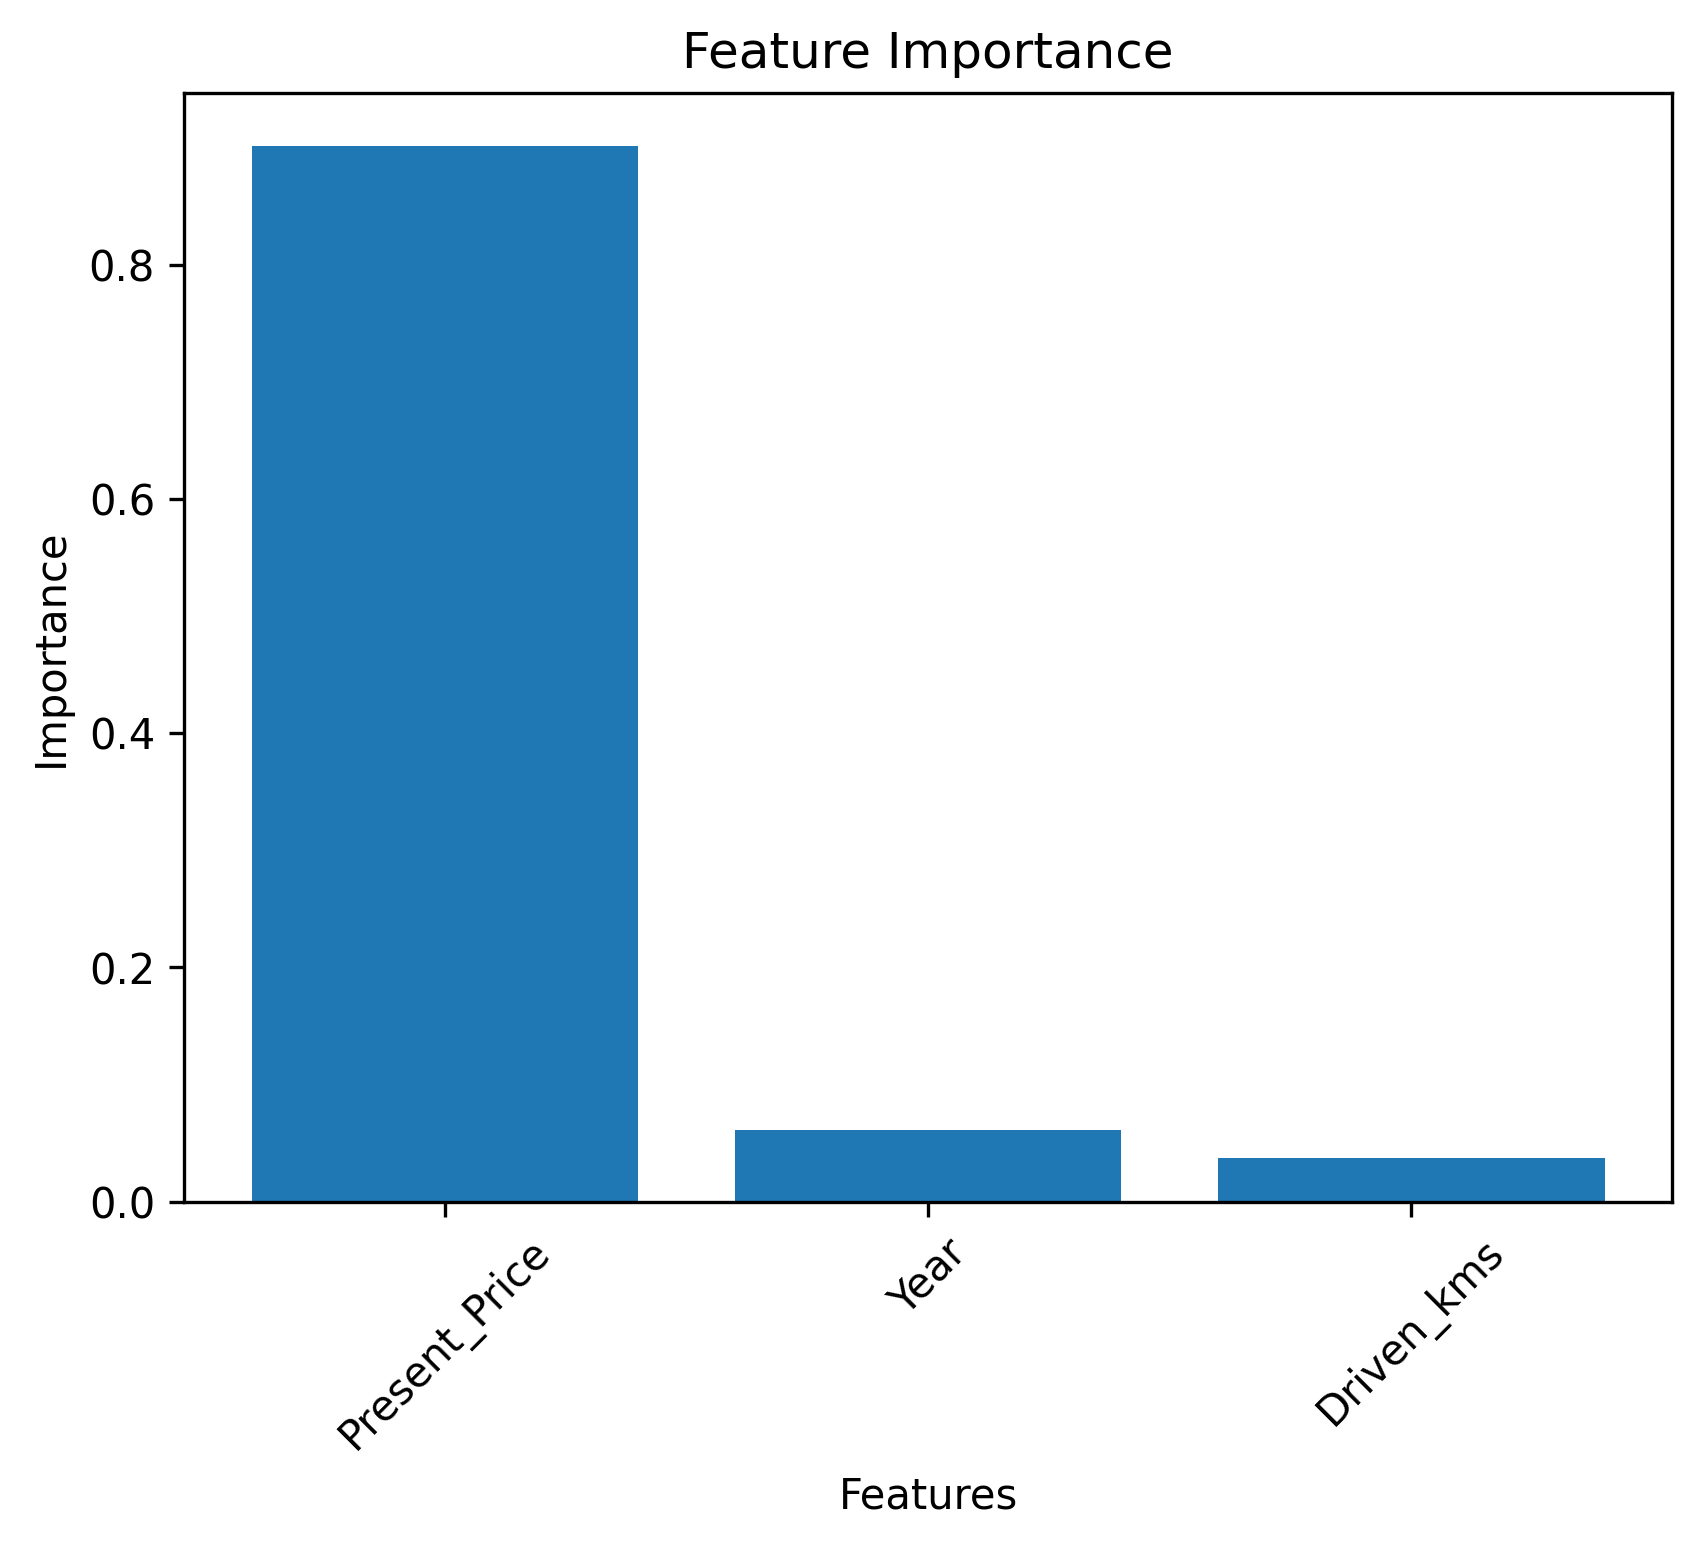

In [8]:
# 모델의 피쳐 중요성 가져오기
importance = model.feature_importances_

# 피쳐 선택
features = ['Year', 'Present_Price', 'Driven_kms']

# 피쳐 중요도를 내림차순으로 정렬
sorted_importance = sorted(zip(features, importance), key=lambda x: x[1], reverse=True)

# 기능 중요도 시각화
sorted_features, sorted_importance = zip(*sorted_importance)
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

## 결론
1. 특징 중요도 해석을 통해 "Present_Price"(현재 가격)가 중고차 판매가격에서 가장 중요한 요소임을 알 수 있었다. 이 정보를 활용해 중고차 판매가격을 예측할 때는 현재 가격에 중점을 두는 것이 중요하다.

2. 평균 절대오차와 결정계수 평가를 통해 모델이 중고차 판매가격을 비교적 정확하게 예측할 수 있음을 알 수 있었다. 이 예측 정확도를 활용하여 미래 중고차 수요를 예측할 수 있다.

상기를 바탕으로 다음과 같은 비즈니스 통찰력과 제언을 얻을 수 있다.

1. 재고관리에 있어서는 특히 "Present_Price"가 중고차 판매가격에 큰 영향을 미치고 있기 때문에 재고의 매입이나 관리에 있어서는 현재의 가격을 중시할 필요가 있다. 수요가 높아지고 있는 차종이나 모델의 현재 가격을 파악하고 재고를 조정하는 것이 효과적이다.

2. 마케팅 전략에서는 중고차 판매가격을 예측함으로써 수요예측에 기반한 마케팅 전략을 세울 수 있다. 수요가 높아질 전망이 있는 차종이나 모델에 대해서는 판촉 활동이나 광고 강화를 실시하는 것으로 수요를 환기할 수 있다.